Import Libraries

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt


Loading Dataset And Process

In [16]:
# Set path to the extracted dataset
DATA_DIR = 'train'  # folder containing cat.0.jpg, dog.1.jpg, ...

# Resize images for faster training
IMG_SIZE = 64

def load_balanced_images(data_dir, img_size=64, per_class_limit=1000):
    X, y = [], []
    cat_count = dog_count = 0
    
    all_files = os.listdir(data_dir)
    np.random.shuffle(all_files)  # Randomize order to avoid bias

    for file in tqdm(all_files):
        if file.startswith("cat") and cat_count < per_class_limit:
            label = 0
            cat_count += 1
        elif file.startswith("dog") and dog_count < per_class_limit:
            label = 1
            dog_count += 1
        else:
            continue

        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())
            y.append(label)

        # Stop if both limits are reached
        if cat_count >= per_class_limit and dog_count >= per_class_limit:
            break

    print(f"Loaded {cat_count} cat images and {dog_count} dog images.")
    return np.array(X), np.array(y)


X, y = load_balanced_images("train", img_size=64, per_class_limit=1000)

# Check if balanced
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))



  8%|▊         | 2024/25000 [01:08<12:52, 29.74it/s]

Loaded 1000 cat images and 1000 dog images.
{0: 1000, 1: 1000}


Split Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


Train THE SVM Classifier

In [18]:
# Use a linear kernel for speed
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

Evaluate Model

In [19]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52       200
           1       0.50      0.46      0.48       200

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



Visualize Predictions

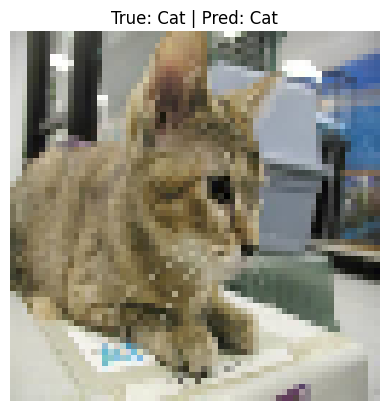

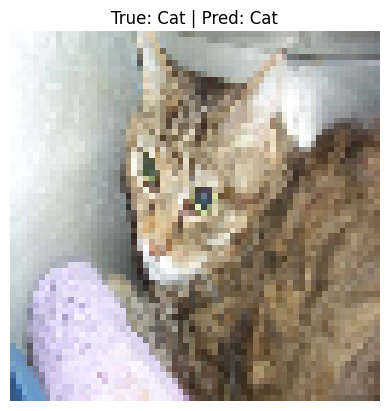

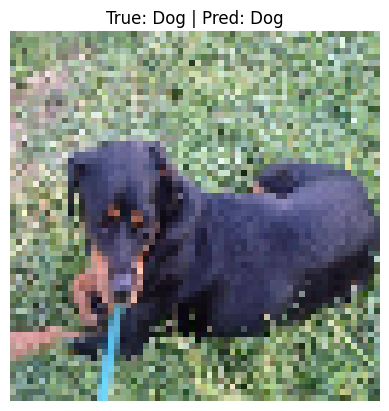

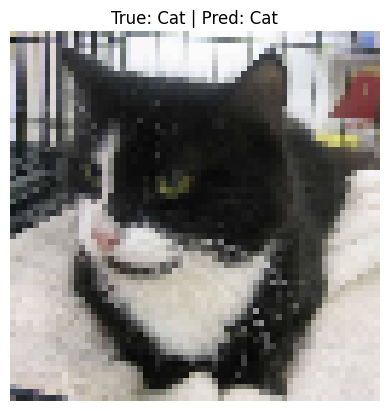

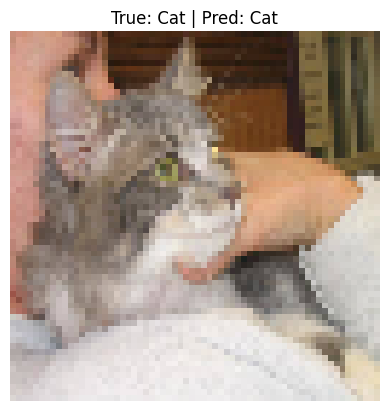

In [20]:
def show_predictions(X_test, y_test, y_pred, num=5):
    for i in range(num):
        img = X_test[i].reshape(IMG_SIZE, IMG_SIZE, 3)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"True: {'Cat' if y_test[i]==0 else 'Dog'} | Pred: {'Cat' if y_pred[i]==0 else 'Dog'}")
        plt.axis('off')
        plt.show()

show_predictions(X_test, y_test, y_pred, num=5)
